In [2]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1
!pip install html5lib
!pip install --upgrade nbformat

zsh:1: command not found: mamba


In [ ]:
# import yfinance as yf

# # Download Tesla stock data
# tesla_data = yf.download('TSLA')

# # Reset the index
# tesla_data.reset_index(inplace=True)

# tesla_data.head()


In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")

In [ ]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
tesla_revenue.tail()

In [12]:
!pip install yfinance

In [3]:
import yfinance as yf

# Download stock data for GameStop (GME)
gme_data = yf.download('GME')

# Reset the index
gme_data_reset = gme_data.reset_index()

# Save the data to a CSV file
gme_data_reset.to_csv('gme_data.csv', index=False)

# Display the first five rows
print(gme_data_reset.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open    Volume
Ticker                  GME       GME       GME       GME       GME
0      2002-02-13  1.691666  1.693350  1.603296  1.620128  76216000
1      2002-02-14  1.683250  1.716073  1.670626  1.712707  11021600
2      2002-02-15  1.674834  1.687458  1.658001  1.683250   8389600
3      2002-02-19  1.607504  1.666418  1.578048  1.666418   7410400
4      2002-02-20  1.662210  1.662210  1.603296  1.615920   6892800


In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL for scraping the revenue data (this is just an example, ensure it points to a valid source)
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Send a GET request to fetch the page
response = requests.get(url)

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the relevant table or data structure
# This example assumes that the data is inside a table, adjust as needed
table = soup.find('table', {'class': 'table'})

# Extract the data into a pandas DataFrame
rows = table.find_all('tr')
data = []

for row in rows[1:]:  # Skipping header row
    columns = row.find_all('td')
    data.append([col.text.strip() for col in columns])

# Create DataFrame
gme_revenue = pd.DataFrame(data, columns=['Year', 'Revenue'])

# Display the last five rows
print(gme_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

In [13]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title="Tesla Stock Prices"):
    # Assuming 'stock_data' has a 'Date' column and a 'Close' column for stock closing prices
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price', color='b')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming tesla_stock_data is a pandas DataFrame containing the Tesla stock data
# make_graph(tesla_stock_data, "Tesla Stock Prices Over Time")


In [14]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="1y")

if tesla_stock_data.empty:
    print("No data returned. Check the source or try again later.")
else:
    print(tesla_stock_data.head())



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


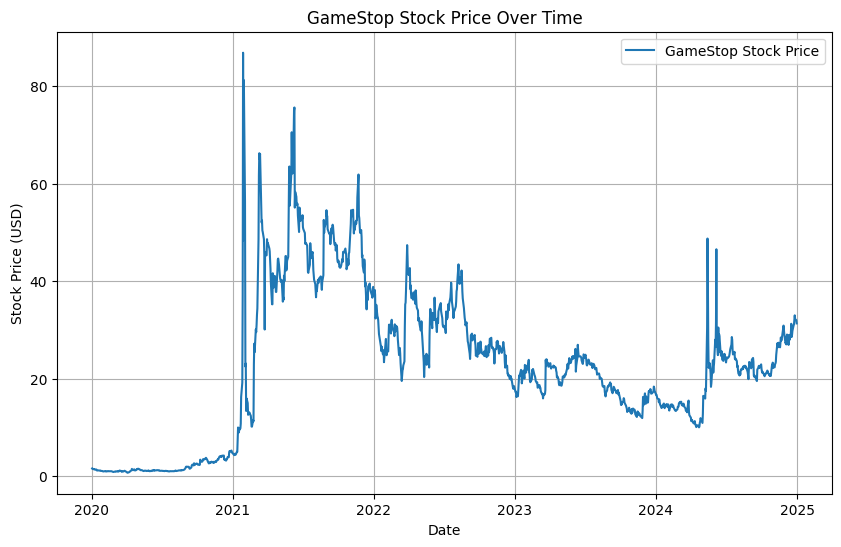

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Download GameStop stock data using Yahoo Finance
gme_data = yf.download('GME', start='2020-01-01', end='2025-01-01')

# Plotting the 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(gme_data.index, gme_data['Close'], label='GameStop Stock Price')
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
